#### Linear Regression

In linear regression models, the target value is modeled as a linear combination of the features. The model is trained on a dataset with known target values. The model can then be used to predict the target value for new data points.

The linear regression model is defined as:

$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

where $y$ is the target value, $x_1$ to $x_n$ are the feature values, and $w_0$ to $w_n$ are the model parameters. The model parameters are learned during the training process using the least squares method.

The linear regression model can be extended to include non-linear features by using a non-linear transformation of the features. For example, the model can be extended to include quadratic features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2$$

The linear regression model can also be extended to include interaction features as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2$$

The linear regression model can be extended to include polynomial features and interaction features at the same time as follows:

$$y = w_0 + w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5x_1x_2$$

We will now extend the linear regression model to include multiple features.  For the data, we will use a dataset that contains information about effect of various forms of advertising media on product sales. We read the data from a CSV file into a Pandas DataFrame.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

# Get the data
advert = pd.read_csv('advertising.csv')
print(advert.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           7.93e-74
Time:                        15:24:53   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

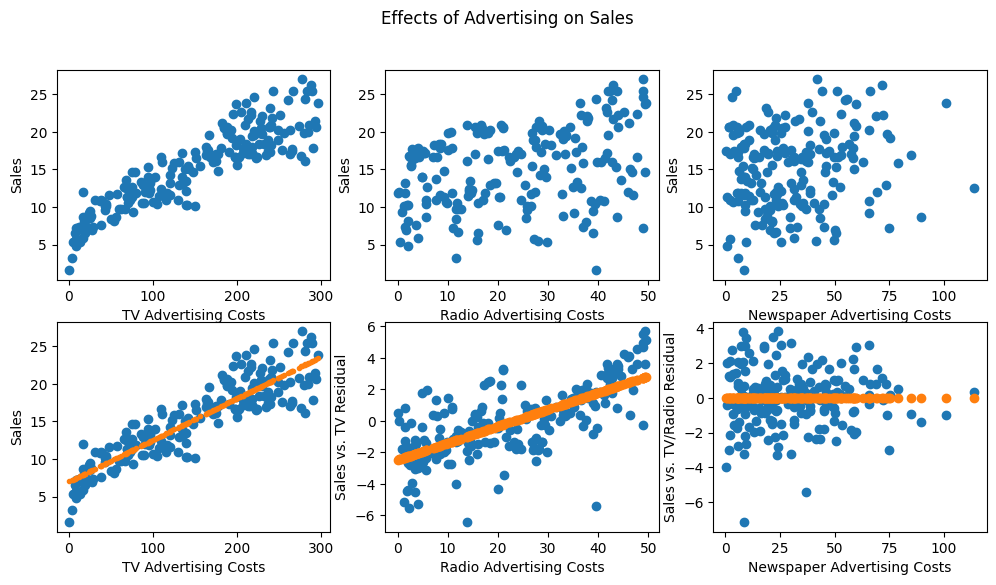

In [2]:
# Look at the data!  Create plots of Sales vs. each variable
fig, ax = plt.subplots(2, 3, figsize=(12,6))
fig.suptitle("Effects of Advertising on Sales")
ax[0][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][0].set_xlabel('TV Advertising Costs')
ax[0][0].set_ylabel('Sales')

ax[0][1].plot(advert['Radio'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][1].set_xlabel('Radio Advertising Costs')
ax[0][1].set_ylabel('Sales')

ax[0][2].plot(advert['Newspaper'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[0][2].set_xlabel('Newspaper Advertising Costs')
ax[0][2].set_ylabel('Sales')

# Fit a linear regression model to a single parameter - Sales vs. TV advertising costs
model = smf.ols('Sales ~ TV', data=advert)
model = model.fit()

# View model summary
# print(model.summary())

# Predict values
sales_pred = model.predict()

# Add this prediction to the DataFrame
advert['Sales_TV'] = sales_pred
# Add the DIFFERENCE between Sales data and prediction to the DataFrame
advert['Sales_TV_Residual'] = advert['Sales'] - sales_pred

# Plot regression against actual data
ax[1][0].plot(advert['TV'], advert['Sales'], 'o', label = "Data")           # scatter plot showing actual data
ax[1][0].plot(advert['TV'], sales_pred, '.', linewidth=2, label = "Prediction")   # regression line
ax[1][0].set_xlabel('TV Advertising Costs')
ax[1][0].set_ylabel('Sales')

print(model.summary())

# Fit a linear regression model to a single parameter - Sales_TV_Residual vs. Radio advertising costs
model2 = smf.ols('Sales_TV_Residual ~ Radio', data=advert)
model2 = model2.fit()
sales_pred2 = model2.predict()
advert['Sales_TV_Radio'] = sales_pred2
advert['Sales_TV_Radio_Residual'] = advert['Sales_TV_Residual'] - sales_pred2

ax[1][1].plot(advert['Radio'], advert['Sales_TV_Residual'], 'o', label = "Data")  # scatter plot showing actual data
ax[1][1].plot(advert['Radio'], sales_pred2, 'o', label = "Data")  # scatter plot showing actual data
ax[1][1].set_xlabel('Radio Advertising Costs')
ax[1][1].set_ylabel('Sales vs. TV Residual')

print(model2.summary())

# Fit a linear regression model to a single parameter - Sales_TV_Radio_Residual vs. Newspaper advertising costs
model3 = smf.ols('Sales_TV_Radio_Residual ~ Newspaper', data=advert)
model3 = model3.fit()
sales_pred3 = model3.predict()
advert['Sales_TV_Radio_Newspaper'] = sales_pred3
advert['Sales_TV_Radio_Newspaper_Residual'] = advert['Sales_TV_Radio_Residual'] - sales_pred3
print(advert.head())

ax[1][2].plot(advert['Newspaper'], advert['Sales_TV_Radio_Residual'], 'o', label = "Data")  # scatter plot showing actual data
ax[1][2].plot(advert['Newspaper'], sales_pred3, 'o', label = "Data")  # scatter plot showing actual data
ax[1][2].set_xlabel('Newspaper Advertising Costs')
ax[1][2].set_ylabel('Sales vs. TV/Radio Residual')

print(model3.summary())

In [4]:
# make new fit with interaction terms and polynomial terms
model4 = smf.ols('Sales ~ TV + Radio + Newspaper + TV*Radio + TV*Newspaper + Radio*Newspaper + TV*Radio*Newspaper + I(TV**2) + I(Radio**2) + I(Newspaper**2)', data=advert)
model4 = model4.fit()
sales_pred4 = model4.predict()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     274.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          8.84e-107
Time:                        15:25:08   Log-Likelihood:                -342.09
No. Observations:                 200   AIC:                             706.2
Df Residuals:                     189   BIC:                             742.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2074      0

### Final Observations

The interaction terms and the polynomial terms all have coefficients consistent with zero and as such are insignificant to the overall fit of the model. Therefore, we can conclude that the linear model is sufficient to describe the data. 